In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

import matplotlib.pyplot as plt

%matplotlib inline

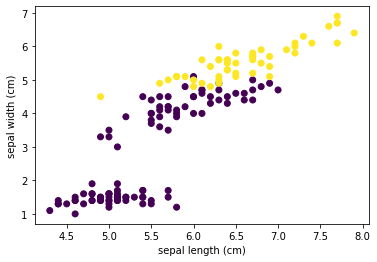

(100, 2) (100,)


In [2]:
# Load data (Iris)

iris = datasets.load_iris()

X_input = iris.data[:,[0,2]]
y_target = iris.target
y_target[y_target==1] = 0 ## Turns into a binary classification problem
y_target[y_target==2] = 1 ## Turns into a binary classification problem
feature_names = iris['feature_names'][:2]

plt.scatter(X_input[:,0], X_input[:,1], c=y_target)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(
    X_input, y_target, test_size=0.33, random_state=42, stratify = y_target)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, y_train.shape)

In [3]:
model = Sequential()
model.add(Input(X_train.shape[1], name = 'Input')) # Input dimension
model.add(Dense(1, activation='sigmoid', name = 'Dense'))

model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [4]:
model.fit(x=X_train, y=y_train, epochs=1000, verbose = 0)

In [5]:
y_pred = model.predict(X_test)

In [6]:
pd.set_option('display.max_columns', None)
pd.DataFrame({'pred':np.round(y_pred[:,0],3), 'real':y_test[:]}).T


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
pred,0.642,0.047,0.09,0.005,0.965,0.203,0.008,0.595,0.447,0.01,0.47,0.195,0.64,0.129,0.034,0.773,0.455,0.22,0.987,0.004,0.731,0.793,0.414,0.784,0.033,0.829,0.845,0.003,0.199,0.671,0.718,0.823,0.286,0.697,0.005,0.011,0.788,0.312,0.019,0.477,0.493,0.016,0.01,0.462,0.679,0.005,0.869,0.099,0.541,0.519
real,1.000,0.000,0.00,0.000,1.000,0.000,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.000,1.000,1.000,0.00,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,1.000,0.000,1.000,1.000,0.000,1.000


In [7]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

In [8]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=500)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

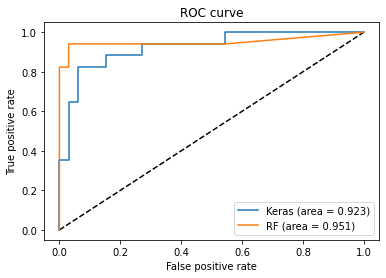

In [9]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [15]:
weights = model.get_weights()
print(weights[0])
print(weights[1])

[[1.3669326]
 [1.7853817]]
[-1.621941]


In [11]:
print("")
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None
